# Regressão Logística Binária

### Importação das bibliotecas, dados e análise inicial

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* O dataset contém dados de pessoas que tiveram resultado positivo para a COVID-19, relacionando com algumas doenças preexistentes

In [3]:
doenca = pd.read_csv('casos_obitos_doencas_preexistentes.csv', sep=';', encoding='utf-8')

In [4]:
doenca.head(10)

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
0,Carapicuíba,3510609,36.0,FEMININO,CONFIRMADO,2020-07-10,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
1,Jacareí,3524402,54.0,FEMININO,CONFIRMADO,2020-07-09,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
2,Vargem Grande Paulista,3556453,33.0,FEMININO,CONFIRMADO,2020-07-10,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
3,Paulínia,3536505,47.0,FEMININO,CONFIRMADO,2021-01-25,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
4,Santo André,3547809,41.0,FEMININO,CONFIRMADO,2021-01-10,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
5,São Paulo,3550308,32.0,FEMININO,CONFIRMADO,NaN,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
6,São Paulo,3550308,34.0,FEMININO,CONFIRMADO,2020-07-01,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
7,São Bernardo do Campo,3548708,43.0,FEMININO,CONFIRMADO,2020-12-20,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
8,São Paulo,3550308,40.0,FEMININO,CONFIRMADO,2020-08-28,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
9,Martinópolis,3529203,38.0,FEMININO,CONFIRMADO,2020-06-11,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO


In [5]:
doenca.shape

(2044699, 20)

In [6]:
doenca.obito.value_counts()

0    1985153
1      59546
Name: obito, dtype: int64

In [7]:
doenca.isnull().sum()

nome_munic                     0
codigo_ibge                    0
idade                       2707
cs_sexo                        1
diagnostico_covid19            0
data_inicio_sintomas       34042
obito                          0
asma                           0
cardiopatia                    0
diabetes                       0
doenca_hematologica            0
doenca_hepatica                0
doenca_neurologica             0
doenca_renal                   0
imunodepressao                 0
obesidade                      0
outros_fatores_de_risco        0
pneumopatia                    0
puerpera                       0
sindrome_de_down               0
dtype: int64

Esse dataset contém mais 2 milhões de respostas (linhas) e 20 atributos/características. Com relação ao obito, 1 985 153 pessoas sobreviveram e 59 546 morreram de COVID-19. 

Temos dados nulos apenas em idade, data do início dos sintomas e 1 em sexo.

* Analisando se existe tendência de obito entre pessoas do sexo masculino e feminino. Como iremos analisar dados do sexo e existe apenas 1 dado nulo, vamos optar por retirar a linha do dataset.

In [8]:
doenca.cs_sexo.value_counts()

FEMININO      1094872
MASCULINO      944309
INDEFINIDO       5487
IGNORADO           30
Name: cs_sexo, dtype: int64

In [9]:
doenca.dropna(subset=['cs_sexo'], inplace=True)

* Como o objetivo é ver a relação com pessoas do sexo feminino e masculino, e as pessoas que responderam indefinido ou ignoraram o campo são poucos dados em relação ao total, iremos retirar os dados de indefinido e ignorado do dataset

In [10]:
df_doenca = doenca.loc[doenca.cs_sexo != 'INDEFINIDO']

In [11]:
df_doenca = df_doenca.loc[doenca.cs_sexo != 'IGNORADO']

In [12]:
df_doenca.cs_sexo.value_counts()

FEMININO     1094872
MASCULINO     944309
Name: cs_sexo, dtype: int64

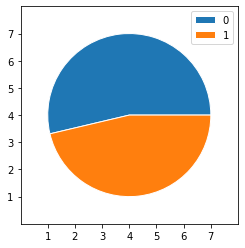

In [13]:
fig, ax = plt.subplots()
ax.pie(df_doenca.cs_sexo.value_counts(), radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)
ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))
plt.legend(df_doenca.obito.value_counts().index)
plt.show()

Há um balanceamento dos dados entre masculino e feminino.

In [14]:
df_doenca.obito.value_counts()

0    1979636
1      59545
Name: obito, dtype: int64

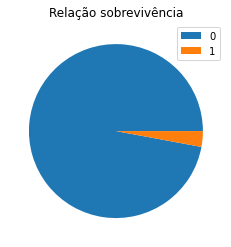

In [15]:
plt.pie(df_doenca.obito.value_counts())
plt.title('Relação sobrevivência')
plt.legend(df_doenca.obito.value_counts().index)
plt.show()

Com relação ao obito, há mais dados de pessoas que foram confirmadas com COVID mas não morreram.

* Analisando os tipos de atributos

In [16]:
df_doenca.dtypes

nome_munic                  object
codigo_ibge                  int64
idade                      float64
cs_sexo                     object
diagnostico_covid19         object
data_inicio_sintomas        object
obito                        int64
asma                        object
cardiopatia                 object
diabetes                    object
doenca_hematologica         object
doenca_hepatica             object
doenca_neurologica          object
doenca_renal                object
imunodepressao              object
obesidade                   object
outros_fatores_de_risco     object
pneumopatia                 object
puerpera                    object
sindrome_de_down            object
dtype: object

Para a regressão logística precisamos de variáveis categóricas. Portanto, iremos alterar o tipo de dado do obito e do sexo.

In [17]:
df_doenca['obito'] = df_doenca['obito'].replace({0: 'Sobreviveu', 1: 'Morreu'})

In [18]:
df_doenca

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
0,Carapicuíba,3510609,36.0,FEMININO,CONFIRMADO,2020-07-10,Sobreviveu,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
1,Jacareí,3524402,54.0,FEMININO,CONFIRMADO,2020-07-09,Sobreviveu,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
2,Vargem Grande Paulista,3556453,33.0,FEMININO,CONFIRMADO,2020-07-10,Sobreviveu,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
3,Paulínia,3536505,47.0,FEMININO,CONFIRMADO,2021-01-25,Sobreviveu,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
4,Santo André,3547809,41.0,FEMININO,CONFIRMADO,2021-01-10,Sobreviveu,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044694,São Paulo,3550308,18.0,MASCULINO,CONFIRMADO,2020-06-17,Sobreviveu,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
2044695,Campos do Jordão,3509700,42.0,FEMININO,CONFIRMADO,2021-01-24,Sobreviveu,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
2044696,Ilha Solteira,3520442,26.0,FEMININO,CONFIRMADO,2021-01-14,Sobreviveu,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
2044697,Guareí,3518503,31.0,MASCULINO,CONFIRMADO,NaN,Sobreviveu,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO


In [19]:
df_doenca['obito'].value_counts()

Sobreviveu    1979636
Morreu          59545
Name: obito, dtype: int64

In [20]:
#df_doenca['cs_sexo'] = df_doenca['cs_sexo'].replace({'FEMININO': 1, 'MASCULINO': 0})

In [21]:
df_doenca.cs_sexo = df_doenca.cs_sexo.astype('category')

In [22]:
df_doenca.obito = df_doenca.obito.astype('category')

In [23]:
df_doenca.dtypes

nome_munic                   object
codigo_ibge                   int64
idade                       float64
cs_sexo                    category
diagnostico_covid19          object
data_inicio_sintomas         object
obito                      category
asma                         object
cardiopatia                  object
diabetes                     object
doenca_hematologica          object
doenca_hepatica              object
doenca_neurologica           object
doenca_renal                 object
imunodepressao               object
obesidade                    object
outros_fatores_de_risco      object
pneumopatia                  object
puerpera                     object
sindrome_de_down             object
dtype: object

In [24]:
y_pred = reg_logistic.predict(x)

NameError: name 'reg_logistic' is not defined

In [ ]:
#Acurácia dos dados de teste
reg_logistic.score(x,y)

In [ ]:
reg_logistic.decision_function(x)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y, y_pred)

## Modelo 1 variável independente

Analisando uma variável independente e categorias mutualmente exclusivas (uma pessoa não pode estar em mais de uma situação).

Para a análise do modelo:

p <= 0 : Modelo estatisticamente significativo

p > 0 : Modelo estatisticamente não significativo

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [31]:
modelo = smf.glm(formula = 'obito ~ cs_sexo', data = df_doenca, family = sm.families.Binomial()).fit()

In [32]:
print(modelo.summary())

                           Generalized Linear Model Regression Results                            
Dep. Variable:     ['obito[Morreu]', 'obito[Sobreviveu]']   No. Observations:              2039181
Model:                                                GLM   Df Residuals:                  2039179
Model Family:                                    Binomial   Df Model:                            1
Link Function:                                      logit   Scale:                          1.0000
Method:                                              IRLS   Log-Likelihood:            -2.6764e+05
Date:                                    Tue, 16 Aug 2022   Deviance:                   5.3528e+05
Time:                                            09:54:43   Pearson chi2:                 2.04e+06
No. Iterations:                                         7                                         
Covariance Type:                                nonrobust                                         
          

Analisando os dados observa-se que valor p é zero, assim o modelo é estatisticamente significativo. Como a variável cs_sexo está masculino, quer dizer que os dados se baseam no nessa variável.

In [33]:
modelo.params

Intercept              -3.734223
cs_sexo[T.MASCULINO]    0.446708
dtype: float64

In [34]:
# Razão de chance com Intervalo de confiança de 95%, colocando na equação 
razao = np.exp(modelo.params[1])
razao

1.5631574840905882

In [35]:
coef = 1/razao
coef

0.6397308077898362

A razão sendo 1,56% diz que em um intervalo de confiança de 95%, a chance de uma pessoa do sexo masculino sobreviver é de 1,56 vezes maior que a do sexo feminino

Já o coeficiente sendo 0,63 significa que a chance de uma pessoa do sexo masculino ir a obito é de 0,63 vezes menor que do sexo feminino

## Modelo 2 mais de 1 variável independente

Diabetes e sexo

In [36]:
df_doenca.diabetes.value_counts()

IGNORADO    1859885
SIM          125108
NÃO           54188
Name: diabetes, dtype: int64

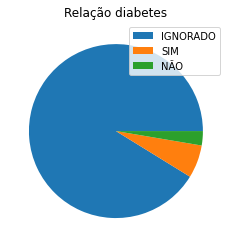

In [37]:
plt.pie(df_doenca.diabetes.value_counts())
plt.title('Relação diabetes')
plt.legend(df_doenca.diabetes.value_counts().index)
plt.show()

Existem uma quantidade significativa de dados ignorados que não representam o sistema em que precisaríamos da relação de pessoas com ou sem diabetes. Sendo assim, ou coletamos mais dados para balancear nossa amostra, ou analisamos outro tipo de atributo.

Como não podemos coletar mais dados, iremos analisar outro tipo de atributo

## Modelo 3 variável independente numérica

Variável idade versus obito

In [38]:
df_doenca.idade.isnull().sum()

2705

In [39]:
len(df_doenca.idade)

2039181

In [40]:
df_doenca.idade.describe()

count    2.036476e+06
mean     4.165667e+01
std      1.753547e+01
min      0.000000e+00
25%      2.900000e+01
50%      4.000000e+01
75%      5.300000e+01
max      1.490000e+02
Name: idade, dtype: float64

<AxesSubplot:>

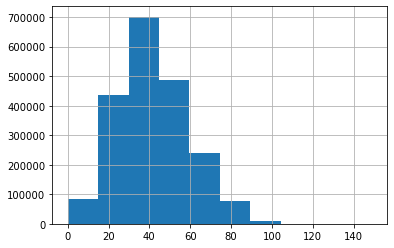

In [41]:
df_doenca['idade'].hist()

In [42]:
print('Mediana: {:.1f} e Média: {:.1f}'.format(df_doenca['idade'].median(), df_doenca['idade'].mean()))

Mediana: 40.0 e Média: 41.7


Em comparação com o todo, existem poucos dados nulos. Iremos fazer substituir esses valores pela mediana afim de não perder muito as informações.

In [43]:
df_doenca['idade'] = df_doenca['idade'].fillna(df_doenca['idade'].median())

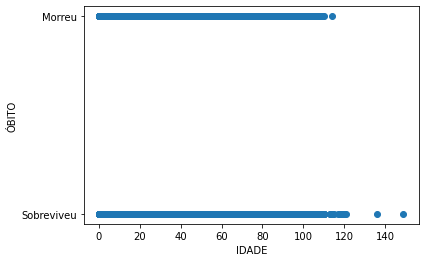

In [44]:
import matplotlib.pyplot as plt
plt.scatter(df_doenca.idade,df_doenca.obito)
plt.xlabel('IDADE')
plt.ylabel('ÓBITO')
plt.grid(False)
plt.show()

In [45]:
modelo3 = smf.glm(formula='obito ~ idade', data = df_doenca, family = sm.families.Binomial()).fit()

In [46]:
print(modelo3.summary())

                           Generalized Linear Model Regression Results                            
Dep. Variable:     ['obito[Morreu]', 'obito[Sobreviveu]']   No. Observations:              2039181
Model:                                                GLM   Df Residuals:                  2039179
Model Family:                                    Binomial   Df Model:                            1
Link Function:                                      logit   Scale:                          1.0000
Method:                                              IRLS   Log-Likelihood:            -1.9719e+05
Date:                                    Tue, 16 Aug 2022   Deviance:                   3.9438e+05
Time:                                            09:55:06   Pearson chi2:                 2.03e+06
No. Iterations:                                         8                                         
Covariance Type:                                nonrobust                                         
          

In [47]:
# Razão de chance com Intervalo de confiança de 95%
razao = np.exp(modelo3.params[1])
razao

1.0966693962901772

Valor p é menor que 0,05 e portanto o modelo é estatísticamente significante. A razaõ sendo 1,10 significa que pessoas mais velhas tem chance de 1,10 vezes maior de sobrevivência que pessoas mais novas.

In [48]:
df_doenca.iloc[:,6]

0          Sobreviveu
1          Sobreviveu
2          Sobreviveu
3          Sobreviveu
4          Sobreviveu
              ...    
2044694    Sobreviveu
2044695    Sobreviveu
2044696    Sobreviveu
2044697    Sobreviveu
2044698    Sobreviveu
Name: obito, Length: 2039181, dtype: category
Categories (2, object): ['Morreu', 'Sobreviveu']

### Construindo o modelo com Sklearn

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
df_doenca.head()

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
0,Carapicuíba,3510609,36.0,FEMININO,CONFIRMADO,2020-07-10,Sobreviveu,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
1,Jacareí,3524402,54.0,FEMININO,CONFIRMADO,2020-07-09,Sobreviveu,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
2,Vargem Grande Paulista,3556453,33.0,FEMININO,CONFIRMADO,2020-07-10,Sobreviveu,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
3,Paulínia,3536505,47.0,FEMININO,CONFIRMADO,2021-01-25,Sobreviveu,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
4,Santo André,3547809,41.0,FEMININO,CONFIRMADO,2021-01-10,Sobreviveu,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO


In [51]:
x = df_doenca[['idade']]
y = df_doenca['obito']

In [52]:
modelo4 = LogisticRegression()
modelo4.fit(x, y)

LogisticRegression()

In [53]:
modelo4.coef_

array([[-0.09227767]])

In [54]:
modelo4.intercept_

array([8.58773881])

In [55]:
np.exp(modelo4.coef_)

array([[0.91185192]])

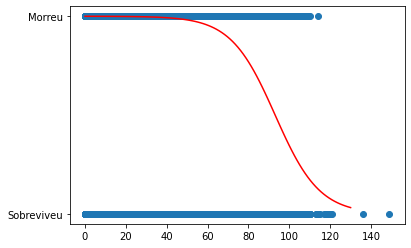

In [56]:
plt.scatter(x, y)
# Geração de novos dados para gerar a função sigmoide
x_teste = np.linspace(0, 130, 100)

def model(w):   # função sigmoide
    return 1 / (1 + np.exp(-w))
# Geração de previsões (variável r) e visualização dos resultados
previsao = model(x_teste * modelo4.coef_ + modelo4.intercept_).ravel()
plt.plot(x_teste, previsao, color = 'red');

In [72]:
y_previsto = modelo4.predict(x)
pd.Series(y_previsto).value_counts()

Sobreviveu    2035138
Morreu           4043
dtype: int64

In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y, y_previsto)

array([[   1452,   58093],
       [   2591, 1977045]], dtype=int64)

In [83]:
accuracy_score(y,y_previsto)

0.9702409938107505

Utilizando a matrix de confusão e a acurácia como métrica para o modelo, obtivemos um resultado significativo.